# Business Problem

---

Bank Rakyat Sejahtera (BRS) memiliki program pinjaman lunak bernama BRS Flexi. Dept kredit consumer BRS ingin mengotomatisasi proses pengambilan keputusan jalur kredit BRS Flexi ini. 

Untuk melakukannya, kami dipercaya membuat model ML untuk prediksi apakah seseorang dikategorikan BAD credit atau tidak

# Model Objective

---

Meminimalkan resiko perusahaan dalam memberikan pinjaman kepada pelanggan yang terindikasi BAD credit

# Goal Criteria

---

Membentuk model ML yg memiliki nilai precision >80% dan mengurangi indikasi total BAD credit

# Data Exploration

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### >> Load Dataset

In [67]:
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [68]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


#### >> Melihat kondisi data

In [69]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [70]:
df.shape
print("Jumlah baris : ", df.shape[0])
print("Jumlah kolom : ", df.shape[1])

Jumlah baris :  5960
Jumlah kolom :  13


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Dari informasi di atas, didapatkan informasi bahwa:
* `BAD` merupakan target
* Dataframe memiliki total 5960 baris dan 13 kolom
* Dataframe masih memiliki *null* values di beberapa kolom 
* Terlalu banyak data kosong pada feature DEBTINC, sehingga untuk mengisi data kosong bisa menggunakan mice imputation

#### >> Membagi dataset menjadi tipe data numerical dan categorical

In [72]:
numerical = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical = ['REASON', 'JOB']

#### >> Statistika deskriptif

In [73]:
df[numerical].describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [74]:
df[categorical].describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


#### >> Boxplot

In [75]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 17, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

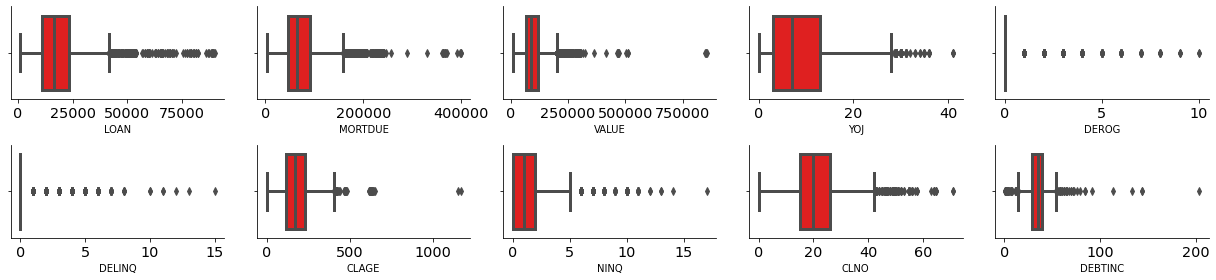

In [76]:
for i in range(0, len(numerical)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[numerical[i]], color='red', orient='v')
    plt.tight_layout()

Dari boxplot di atas, terlihat bahwa :
* Hampir semua feature memiliki outlier
* Hampir semua distribusi bersifat *skewed*

#### >> Distribusi Plot

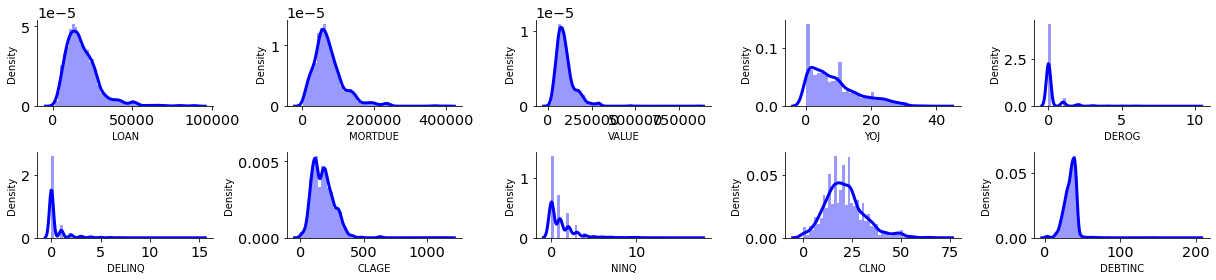

In [77]:
plt.figure(figsize=(17, 4))
for i in range(0, len(numerical)):
    plt.subplot(2, 5, i+1)
    sns.distplot(df[numerical[i]], color='blue')
    plt.tight_layout()

Dari distribusi plot di atas, terlihat bahwa hampir semua distribusi bersifat *skewed*

#### >> Barplot

In [78]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

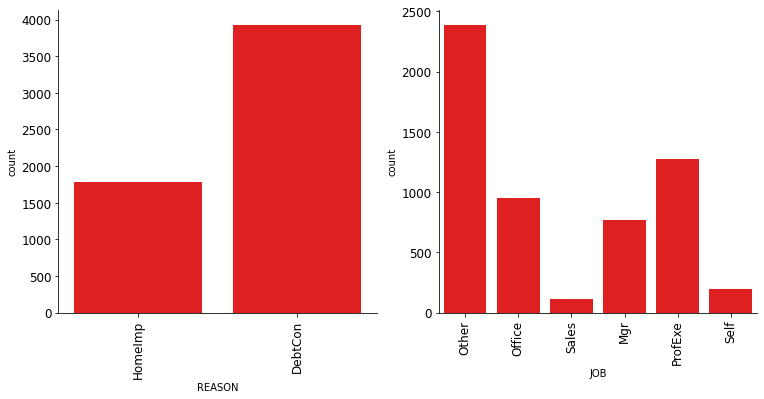

In [79]:
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[categorical[i]], color='red', orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

Dari barplot / countplot di atas, terlihat bahwa pada feature `JOB` didominasi oleh Other dan pada feature `REASON` didominasi oleh DebtCOn

# Data Preprocessing

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### >> Missing Data

In [81]:
missing = df.isna().sum()
missing

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

### >> Persentase Missing Data

In [82]:
df.isna().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

#### >> Mengisi Nilai Kosong `DEBTINC` dengan MICE (Multiple Imputation with Chained Equations)

In [83]:
!pip install impyute

In [84]:
from impyute.imputation.cs import mice

In [85]:
x = df[['BAD', 'DEBTINC']].to_numpy()
data = mice(x)
print(data)

[[ 1.         39.38764489]
 [ 1.         39.38764489]
 [ 1.         39.38764489]
 ...
 [ 0.         35.55659049]
 [ 0.         34.34088237]
 [ 0.         34.57151913]]


In [86]:
debtinc = pd.DataFrame(data)
df['DEBTINC'] = debtinc[1]
df['DEBTINC']


0       39.387645
1       39.387645
2       39.387645
3       39.387645
4       33.253129
          ...    
5955    36.112347
5956    35.859971
5957    35.556590
5958    34.340882
5959    34.571519
Name: DEBTINC, Length: 5960, dtype: float64

In [87]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >>Mengisi data-data yang kosong/Imputation (Numeric) dengan mean atau median

##### Mencari nilai skew dari variable 'DEROG', 'DELINQ', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO'

In [88]:
skew = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO']
df_skewness_value = df[skew].skew(axis = 0, skipna = True)
df_skewness_value

LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
dtype: float64

#### Karena nilai skew dari variable `VALUE`, `DEROG`, `DELINQ` dan `NINQ` lebih dari 2.5, maka bentuk distribusi data adalah *skewed positif*. Sehingga untuk mengisi nilai kosong menggunakan median. Selain variable `VALUE`, `DEROG`, `DELINQ` dan `NINQ`, untuk mengisi nilai kosong menggunakan mean.

In [89]:
import random

In [90]:
def random_input(x):
  mean = df[x].mean()
  std = df[x].std()
  lower_limit = round(mean - std, 0)
  upper_limit = round(mean + std, 0)
  random_list = []
  for i in range(0, missing[x]):
    random_list.append(random.randint(lower_limit, upper_limit))

  random_list = np.array(random_list)

  list = df[x].values

  k = 0
  for i,j in enumerate(list):
    if np.isnan(list[i]):
      list[i] = random_list[k]
      k+=1

  df[x] = list

In [91]:
for i in skew:
    if df_skewness_value[i] > 2.5:
        df[i].fillna(df[i].median(),inplace=True)
    elif df_skewness_value[i] < 2.5:
        random_input(i)

In [92]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,61739.0,89235.5,NaN,NaN,4.0,0.0,0.0,123.000000,1.0,31.0,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >> Mengisi data-data yang kosong/Imputation (Categorical) menggunakan modus

In [93]:
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode()[0], inplace=True)


In [94]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,61739.0,89235.5,DebtCon,Other,4.0,0.0,0.0,123.000000,1.0,31.0,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >> Mengecek apakah masih ada data yang kosong

In [95]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### >> Menghapus Duplicated Data

In [96]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print("Jumlah data ganda setelah dihapus:",df.duplicated().sum())

Jumlah data ganda setelah dihapus: 0


### >> Menghapus Outliers

In [97]:
from scipy import stats

nums = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


#### * Metode Z-Score

In [98]:
print('Jumlah baris sebelum memfilter outlier:', {len(df)})

filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df[filtered_entries]

print('Jumlah baris setelah memfilter outlier:', {len(df_zscore)})

Jumlah baris sebelum memfilter outlier: {5960}
Jumlah baris setelah memfilter outlier: {5246}


#### * Metode IQR

In [99]:
print('Jumlah baris sebelum memfilter outlier:', {len(df)})

filtered_data = np.array([True] * len(df))
for col in nums:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_data = ((df[col] > low_limit) & (df[col] < high_limit))
  
df_IQR = df[filtered_data]

print('Jumlah baris setelah memfilter outlier:', {len(df_IQR)})


Jumlah baris sebelum memfilter outlier: {5960}
Jumlah baris setelah memfilter outlier: {5792}


### >> Boxplot sebelum dan sesudah memfilter outlier

In [100]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#### Sebelum memfilter outlier

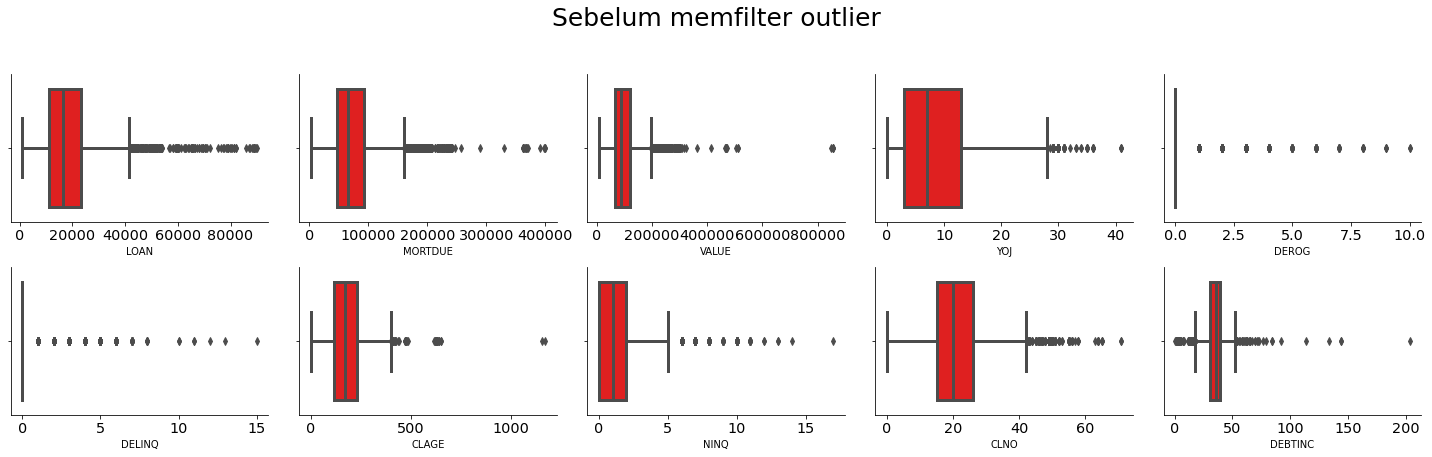

In [101]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[nums[i]], color='red', orient='v')
    plt.suptitle('Sebelum memfilter outlier', y=1.05, fontsize=25)
    plt.tight_layout()


#### Setelah memfilter outlier menggunakan z-score

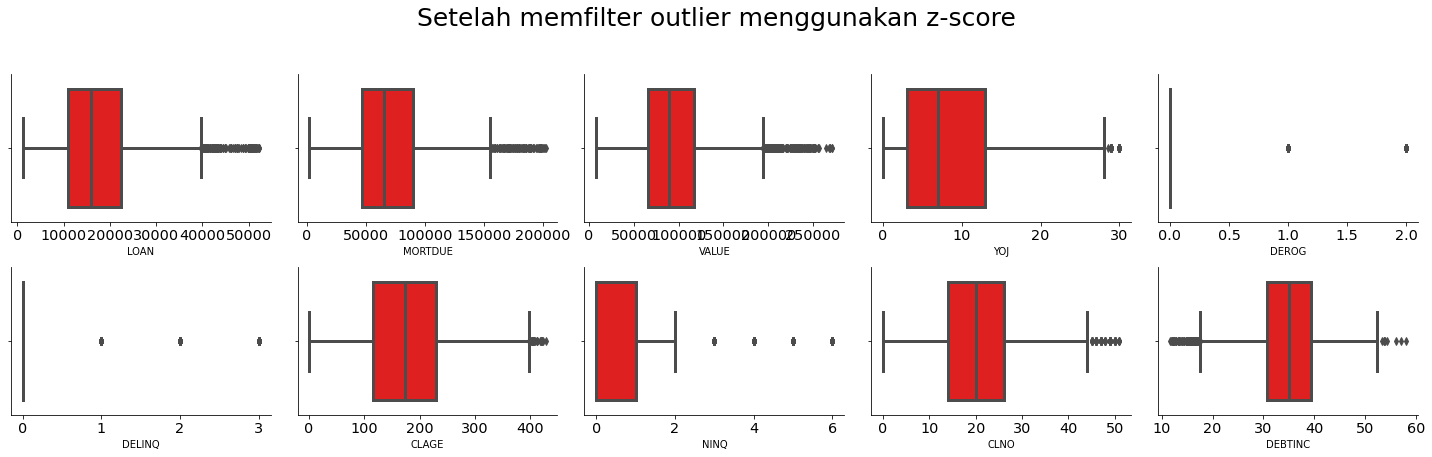

In [102]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df_zscore[nums[i]], color='red', orient='v')
    plt.suptitle('Setelah memfilter outlier menggunakan z-score', y=1.05, fontsize=25)
    plt.tight_layout()

#### Setelah memfilter outlier menggunakan IQR

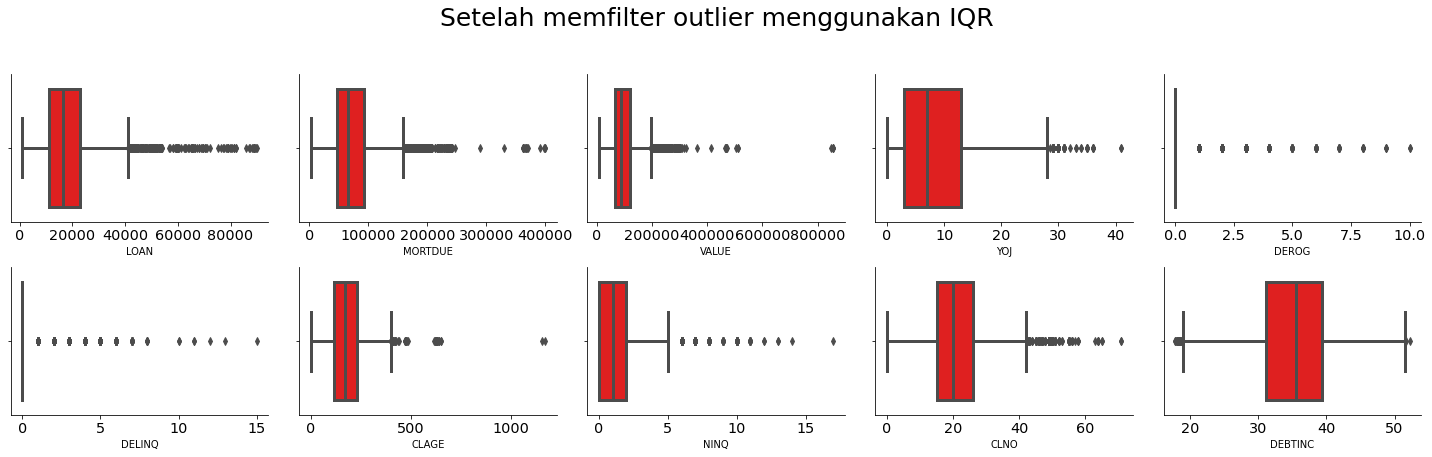

In [103]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df_IQR[nums[i]], color='red', orient='v')
    plt.suptitle('Setelah memfilter outlier menggunakan IQR', y=1.05, fontsize=25)
    plt.tight_layout()

Dari dua metode (z-score dan IQR) yang digunakan untuk memfilter outlier, dapat disimpulkan bahwa metode z-score memiliki hasil yang lebih baik karena lebih banyak membuang outlier.

#### >> Pairplot

In [104]:
df = df_zscore

<Figure size 1080x1080 with 0 Axes>

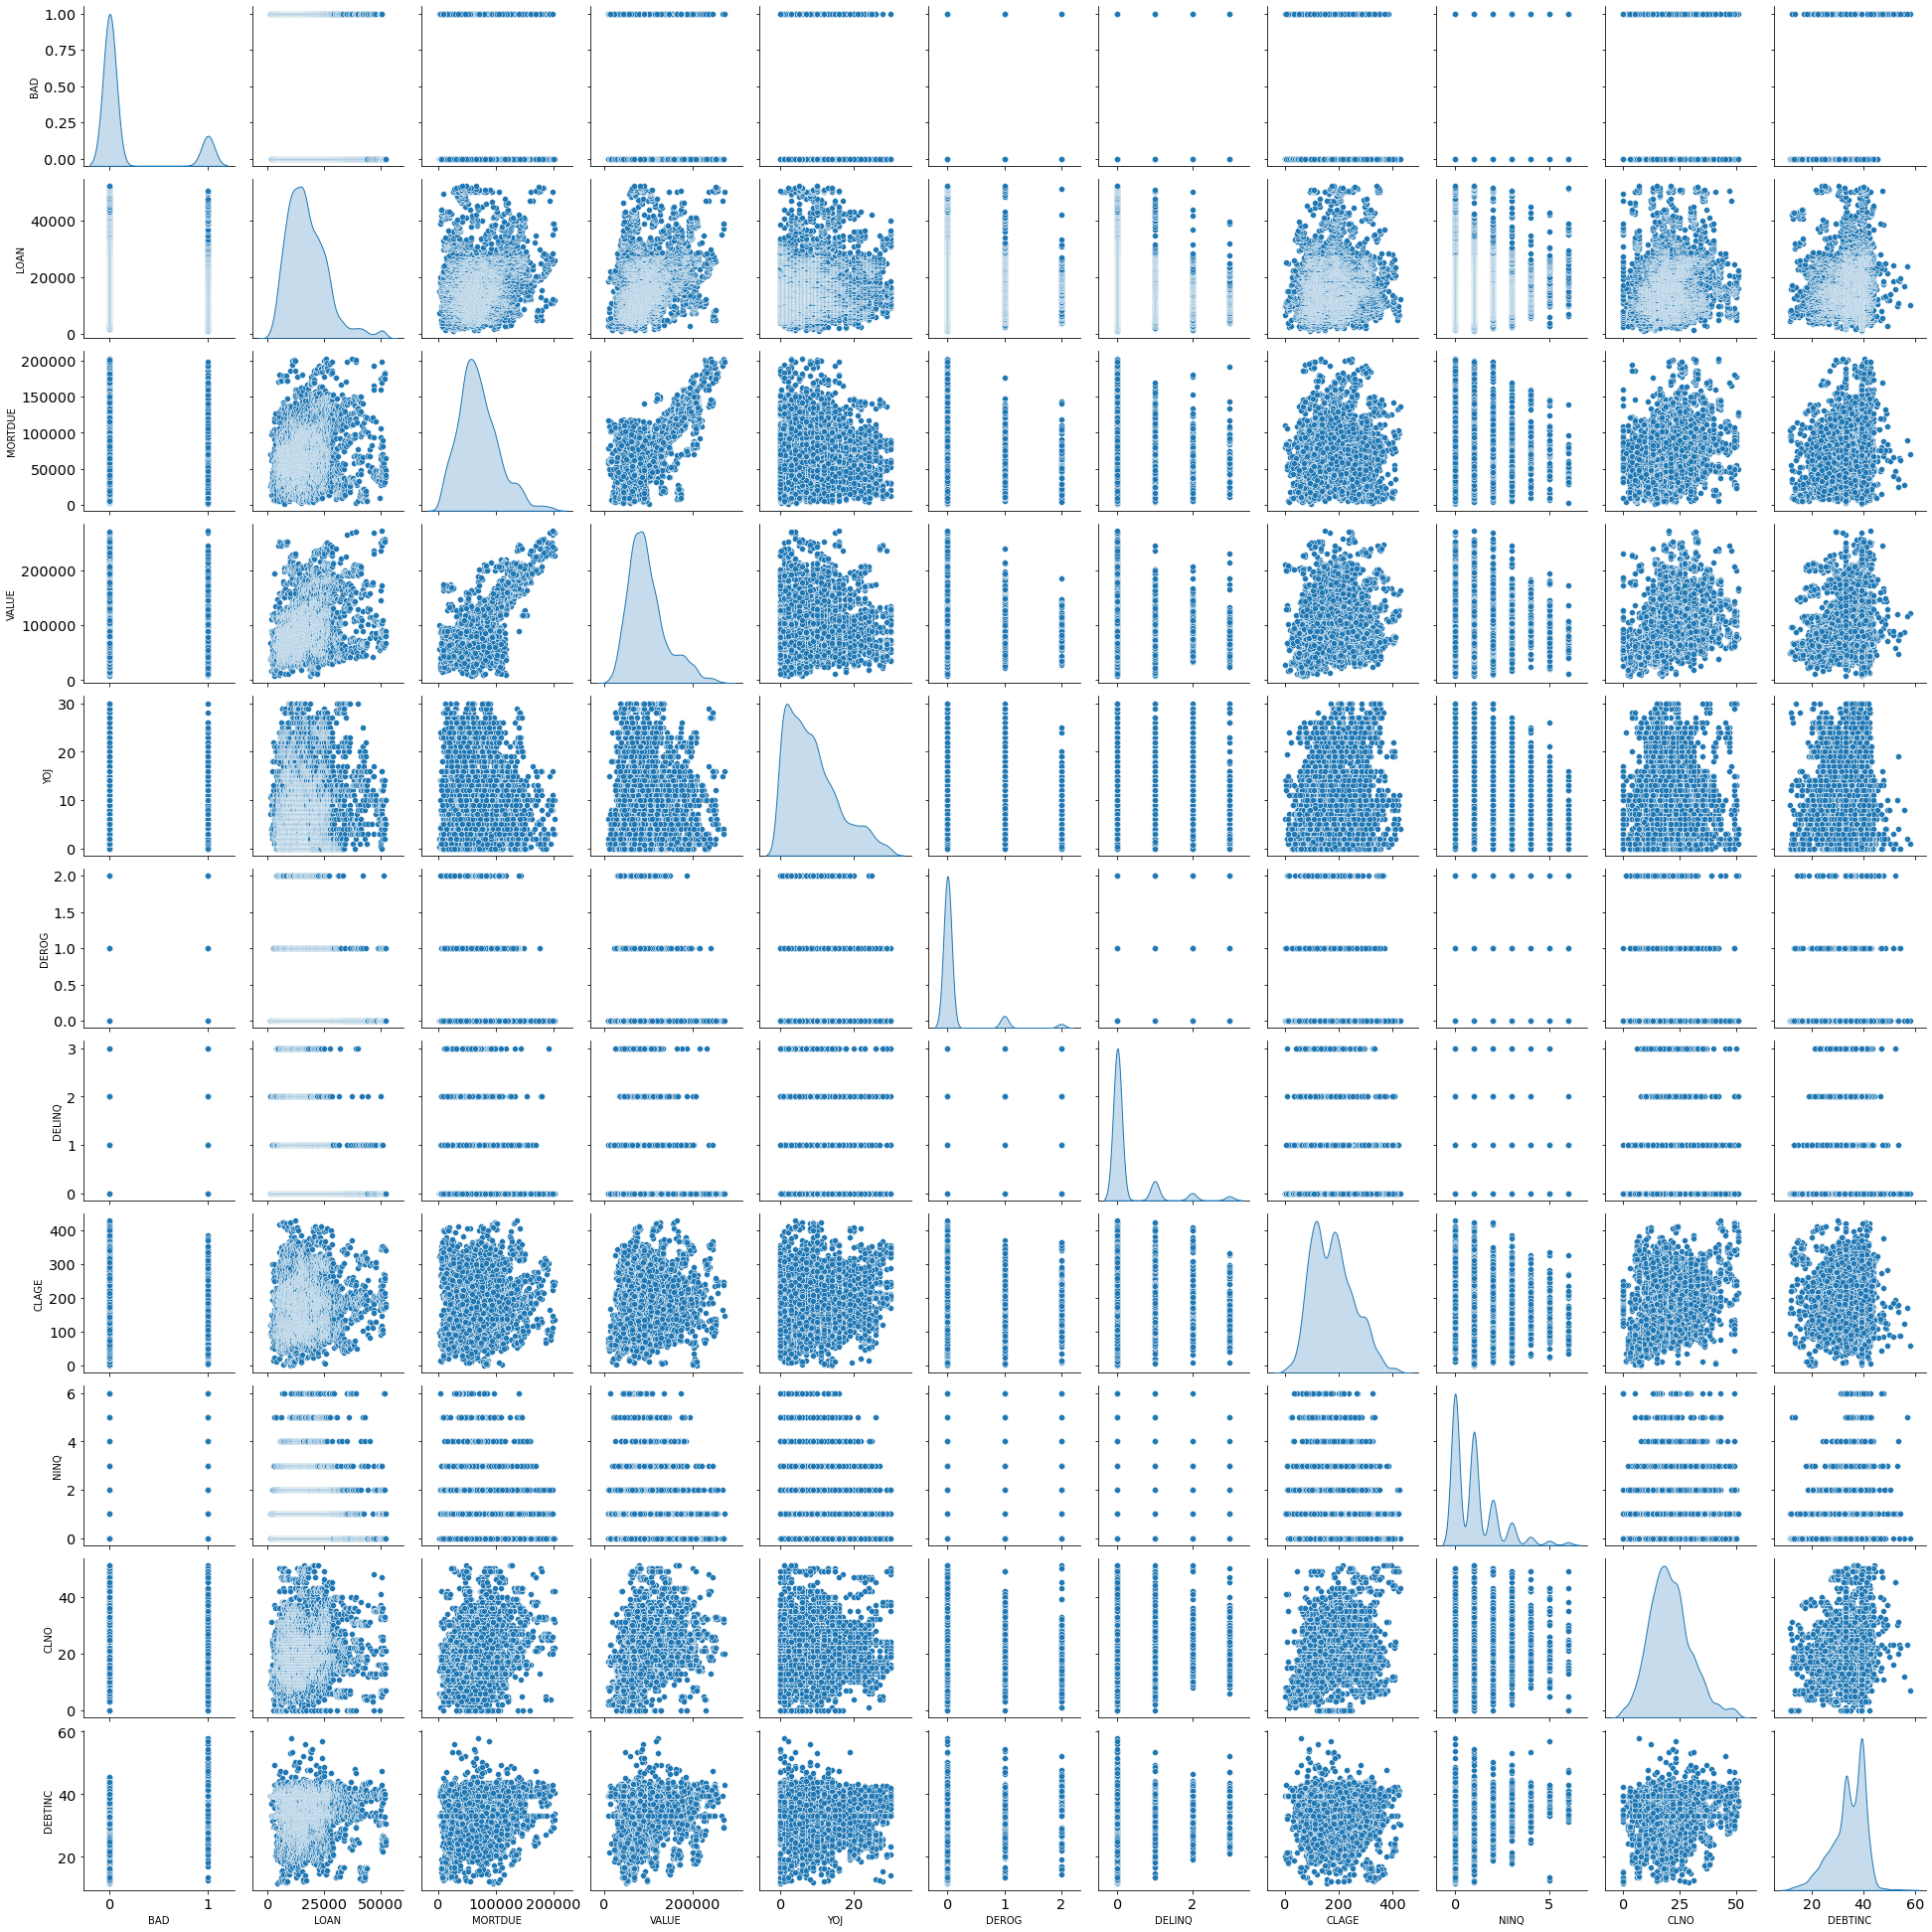

In [105]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

### >> Correlation heatmap

<AxesSubplot:>

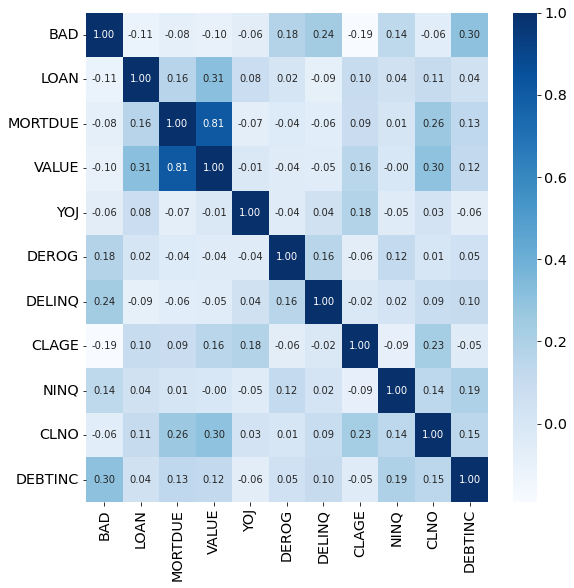

In [106]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari correlation heatmap di atas dapat dilihat bahwa feature `DEBTINC`,`DELINQ` dan `DEROG` memiliki korelasi paling tinggi berturut-turut terhadap target (`BAD`) dibandingkan dengan feature yang lain

### >> Pie Chart Target `BAD`

In [107]:
df.groupby('BAD')['BAD'].count()

BAD
0    4379
1     867
Name: BAD, dtype: int64

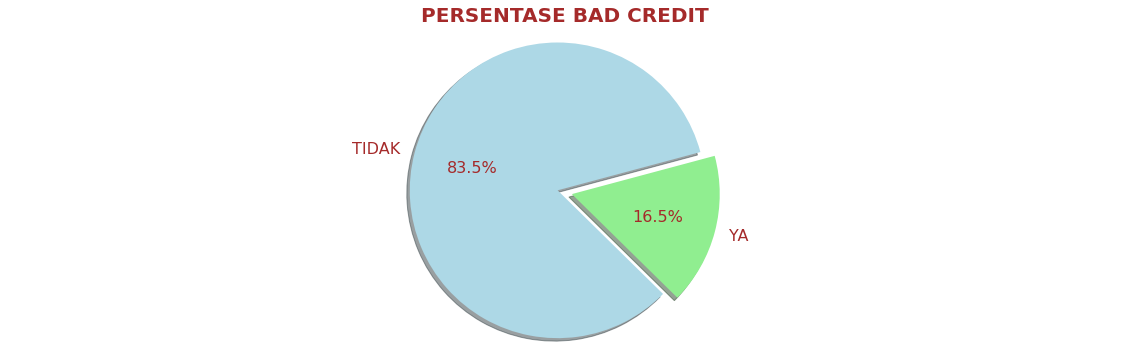

In [108]:
Tasks = df.groupby('BAD').size()

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('PERSENTASE BAD CREDIT', fontsize=20, fontweight='bold', color='brown')
plt.show()

### >> Melihat pengaruh feature `REASON` terhadap Target `BAD`

In [109]:
df.groupby(['BAD', 'REASON'])['REASON'].count()


BAD  REASON 
0    DebtCon    3124
     HomeImp    1255
1    DebtCon     566
     HomeImp     301
Name: REASON, dtype: int64

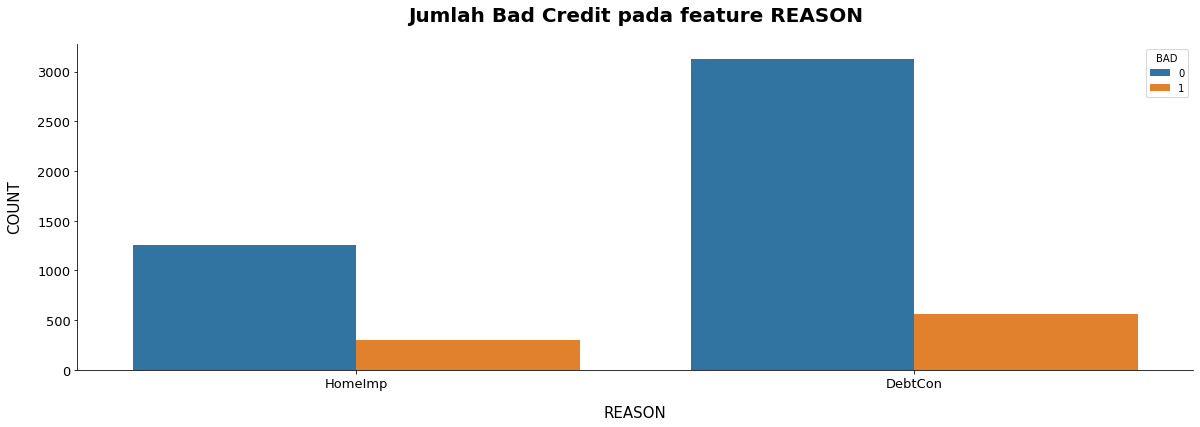

In [110]:
sns.countplot(x = 'REASON', hue = 'BAD', data = df)
plt.xlabel('REASON', size=15, labelpad=15)
plt.ylabel('COUNT', size=15, labelpad=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Jumlah Bad Credit pada feature REASON', size=20, y=1.05, fontweight='bold')

plt.show()

In [111]:
dfa = df.loc[df['REASON']=='HomeImp',['REASON','BAD']]
df_home = dfa.groupby('BAD')

dfb = df.loc[df['REASON']=='DebtCon',['REASON','BAD']]
df_debt = dfb.groupby('BAD')


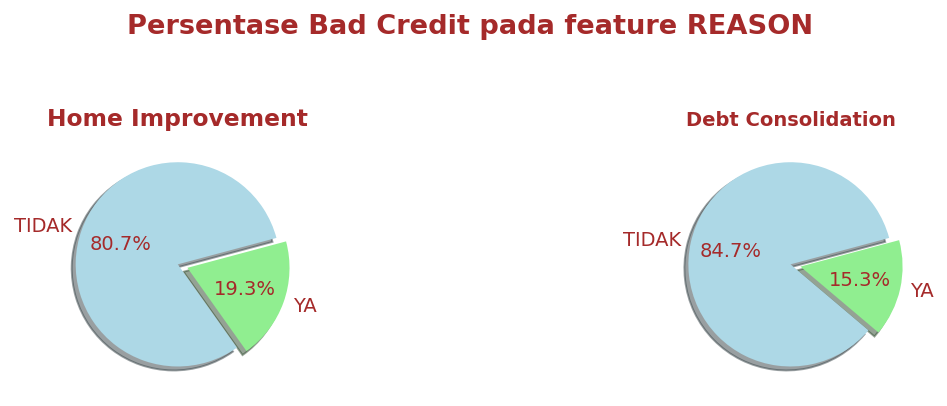

In [112]:
fig = plt.figure(figsize=(8,3),dpi=140)

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)

ax1 = fig.add_subplot(131)
pic = df_home.BAD.value_counts().to_frame()
ax1.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Home Improvement', fontsize=12, fontweight='bold', color='brown')

ax2 = fig.add_subplot(133)
pic = df_debt.BAD.value_counts().to_frame()
ax2.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Debt Consolidation', fontsize=10, fontweight='bold', color='brown')

plt.suptitle('Persentase Bad Credit pada feature REASON', y=1.10, fontsize=14, fontweight='bold', color ='brown')
plt.show()

### >> Bad Credit Debt Consolidation VS Home Improvement

In [113]:
dfx = df.loc[df['BAD']==1,['BAD','REASON']]
df_reason= dfx.groupby('REASON').size()


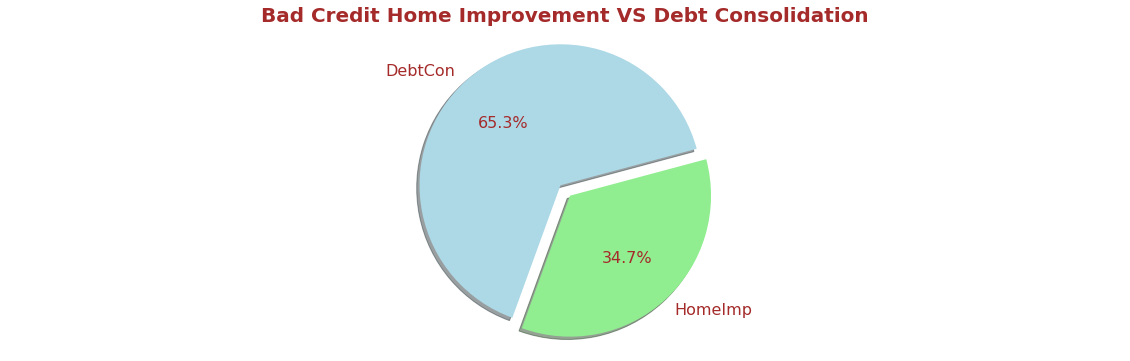

In [114]:
my_labels = 'DebtCon','HomeImp'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(df_reason, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('Bad Credit Home Improvement VS Debt Consolidation', fontsize=20, fontweight='bold', color='brown')
plt.show()

#### Kesimpulan:
* Jumlah 'Home Improvement' yang bad credit (301 atau 19.3%) lebih sedikit daripada yang good credit (1255 atau 80.7%)
* Demikian juga dengan 'Debt Consolidation', jumlah bad credit (566 atau 15.3%) lebih sedikit  daripada yang good credit (3124 atau 84.7%)
* Jumlah bad credit Debt Consolidation (566 atau 65.3%) lebih besar daripada jumlah bad credit pada Home Improvement (301 atau 34.7%)

### >> Melihat pengaruh feature `JOB` terhadap Target `BAD`

In [115]:
bad_reason = df.groupby(['BAD', 'JOB'])['JOB'].count()
bad_reason

BAD  JOB    
0    Mgr         530
     Office      777
     Other      1913
     ProfExe     981
     Sales        71
     Self        107
1    Mgr         125
     Office       93
     Other       450
     ProfExe     134
     Sales        29
     Self         36
Name: JOB, dtype: int64

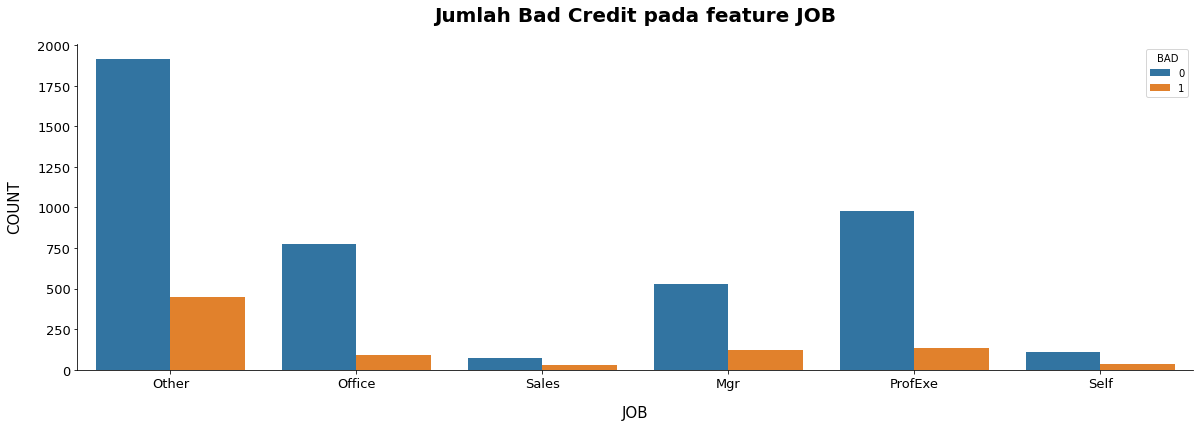

In [116]:
sns.countplot(x = 'JOB', hue = 'BAD', data = df)
plt.xlabel('JOB', size=15, labelpad=15)
plt.ylabel('COUNT', size=15, labelpad=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Jumlah Bad Credit pada feature JOB', size=20, y=1.05, fontweight='bold')

plt.show()

In [117]:
df1 = df.loc[df['JOB']=='Mgr',['JOB','BAD']]
df_mgr = df1.groupby('BAD')

df2 = df.loc[df['JOB']=='Office',['JOB','BAD']]
df_office = df2.groupby('BAD')

df3 = df.loc[df['JOB']=='Other',['JOB','BAD']]
df_other = df3.groupby('BAD')

df4 = df.loc[df['JOB']=='ProfExe',['JOB','BAD']]
df_prof = df4.groupby('BAD')

df5 = df.loc[df['JOB']=='Sales',['JOB','BAD']]
df_sales = df5.groupby('BAD')

df6 = df.loc[df['JOB']=='Self',['JOB','BAD']]
df_self = df6.groupby('BAD')

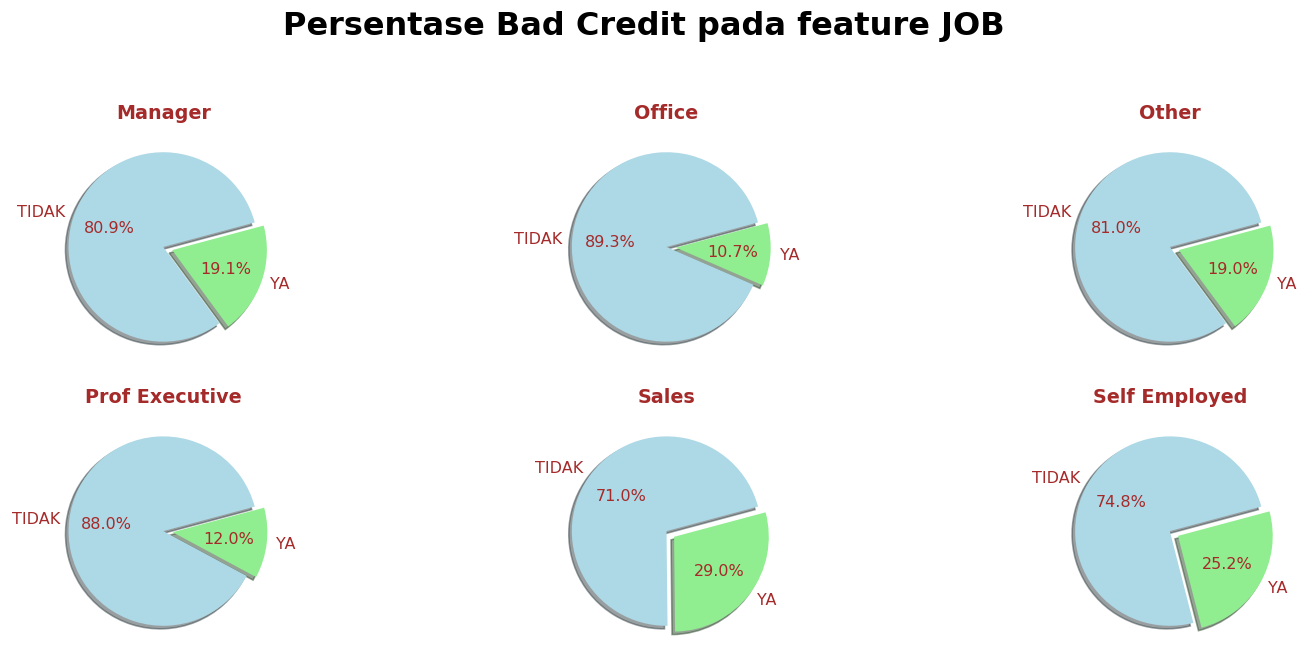

In [118]:
fig = plt.figure(figsize=(16,6),dpi=115)

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)

ax1 = fig.add_subplot(231)
pic = df_mgr.BAD.value_counts().to_frame()
ax1.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Manager', fontsize=12, fontweight='bold', color='brown')

ax2 = fig.add_subplot(232)
pic = df_office.BAD.value_counts().to_frame()
ax2.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Office', fontsize=12, fontweight='bold', color='brown')

ax3 = fig.add_subplot(233)
pic = df_other.BAD.value_counts().to_frame()
ax3.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Other', fontsize=12, fontweight='bold', color='brown')

ax4 = fig.add_subplot(234)
pic = df_prof.BAD.value_counts().to_frame()
ax4.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Prof Executive', fontsize=12, fontweight='bold', color='brown')

ax5 = fig.add_subplot(235)
pic = df_sales.BAD.value_counts().to_frame()
ax5.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Sales', fontsize=12, fontweight='bold', color='brown')

ax6 = fig.add_subplot(236)
pic = df_self.BAD.value_counts().to_frame()
ax6.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Self Employed', fontsize=12, fontweight='bold', color='brown')

plt.suptitle('Persentase Bad Credit pada feature JOB', y=1.05, fontsize=20, fontweight='bold')
plt.show()

### >> Bad Credit pada masing-masing Job

In [119]:
dfy = df.loc[df['BAD']==1,['BAD','JOB']]
df_job= dfy.groupby('JOB').size()
df_job

JOB
Mgr        125
Office      93
Other      450
ProfExe    134
Sales       29
Self        36
dtype: int64

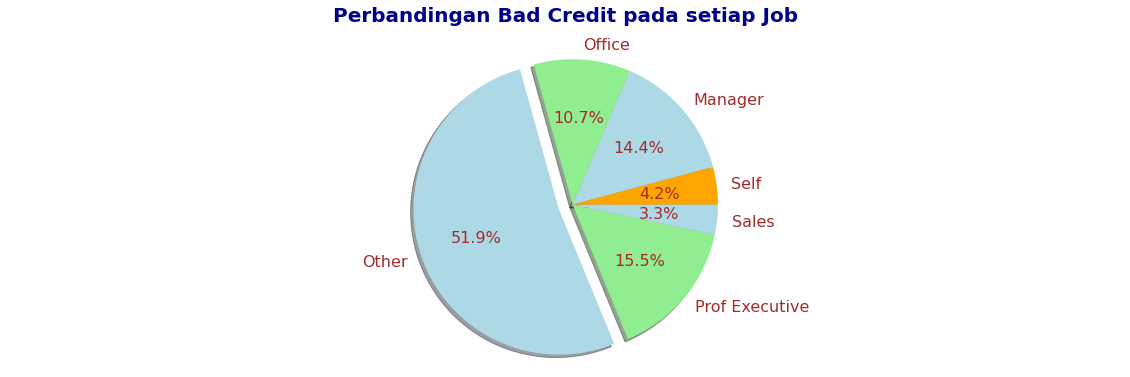

In [120]:
my_labels = 'Manager','Office','Other','Prof Executive','Sales','Self'
my_colors = ['lightblue','lightgreen','lightblue','lightgreen', 'lightblue', 'orange']
my_explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(df_job, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('Perbandingan Bad Credit pada setiap Job', fontsize=20, fontweight='bold', color='darkblue',  y=1.05)
plt.show()

#### Kesimpulan:
* Pada feature `JOB`, semua jenis pekerjaan memiliki jumlah bad credit yang lebih kecil daripada good credit.
* Jenis pekerjaan `Other` memiliki jumlah bad credit (450 atau 51.9%) yang paling besar daripada jenis pekerjaan yang lain.
* Sedangkan jenis pekerjaan `Sales` memiliki jumlah bad credit (29 atau 3.3%) yang paling kecil daripada jenis pekerjaan yang lain.

### >> Featue Encoding

In [121]:
from sklearn.preprocessing import LabelEncoder

df['REASON_CODE'] = LabelEncoder().fit_transform(df['REASON'])
df['JOB_CODE'] = LabelEncoder().fit_transform(df['JOB'])

df = df.drop(columns=['REASON', 'JOB'])



In [122]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_CODE,JOB_CODE
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645,1,2
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645,1,2
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645,1,2
3,1,1500,61739.0,89235.5,4.0,0.0,0.0,123.000000,1.0,31.0,39.387645,0,2
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129,1,1


### >> Feature Importance

In [123]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


X = df.drop('BAD', axis=1)
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

##### Method #1 — Mendapatkan importances dari Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

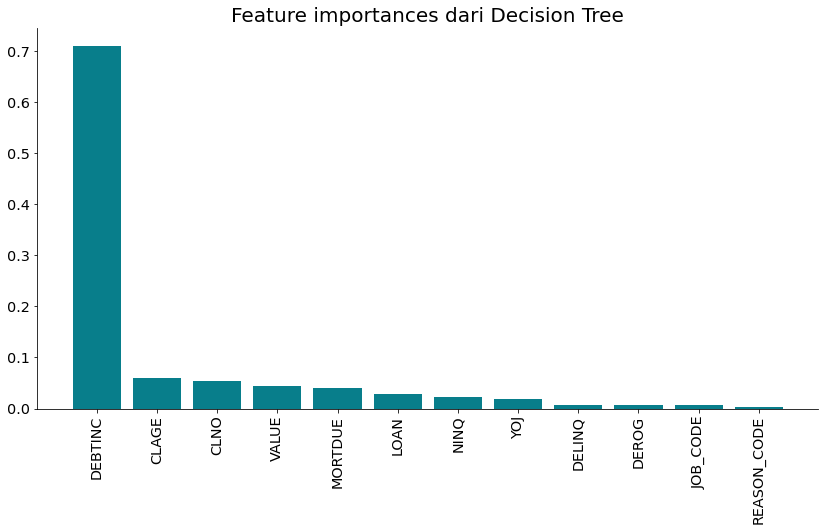

In [125]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari Decision Tree', size=20)
plt.xticks(rotation='vertical')
plt.show()

##### Method #2 — Mendapatkan importances dari Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

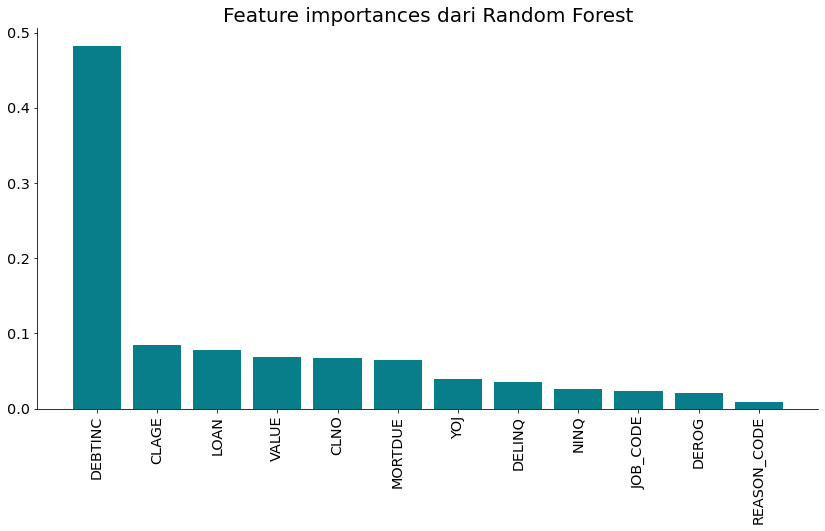

In [127]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

##### Method #3 — Mendapatkan importances dari XGBoost

In [128]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

ModuleNotFoundError: No module named 'xgboost'

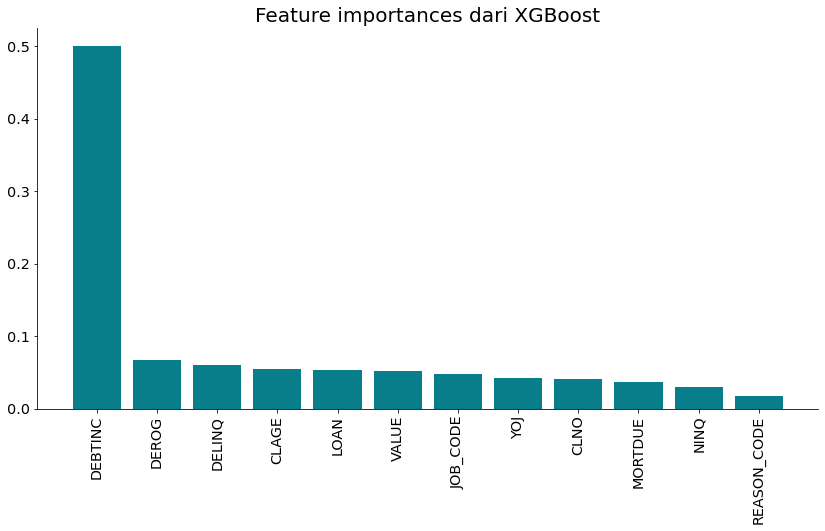

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari XGBoost', size=20)
plt.xticks(rotation='vertical')
plt.show()

##### Method #4 — Mendapatkan importances dari coefficients

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

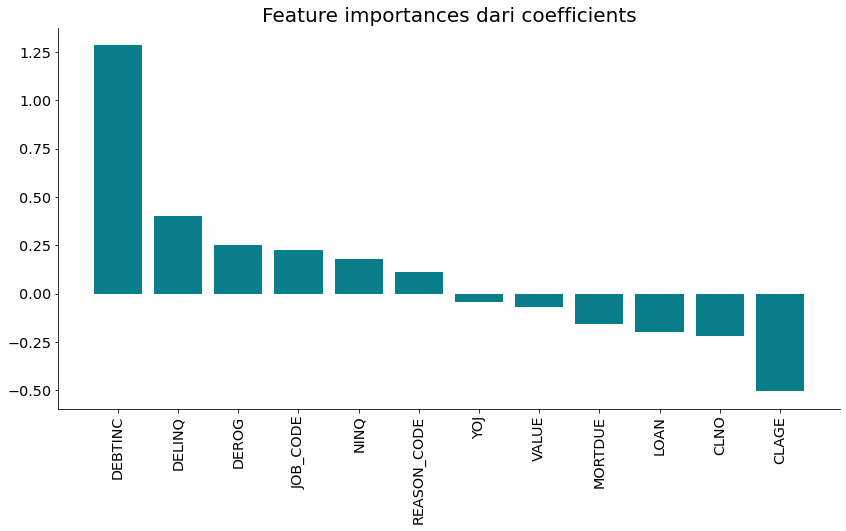

In [133]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

##### Method #5 — Mendapatkan importances dari PCA loading scores

In [134]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

In [135]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
LOAN,0.450716,0.001000,-0.286693,-0.447430,0.399599,-0.096226,0.174828,-0.208328,0.211693,0.444694,0.160428,-0.059427
MORTDUE,0.831129,-0.067266,0.325613,0.076643,-0.022905,-0.224151,0.013254,0.057663,-0.172192,-0.122493,-0.130578,-0.277669
VALUE,0.885501,-0.125018,0.226344,0.044705,0.068248,-0.175987,0.036717,0.009393,-0.107837,-0.006435,-0.091296,0.300383
YOJ,-0.003498,-0.321808,-0.639232,0.140133,0.107999,-0.135823,0.477310,-0.168536,-0.264773,-0.333044,0.032837,-0.001805
DEROG,-0.044660,0.452288,0.015558,0.238893,0.656360,-0.039807,0.118566,0.499220,0.114942,-0.155824,0.056823,0.002816
DELINQ,-0.062836,0.313882,-0.172903,0.626937,0.262151,-0.142486,-0.327209,-0.428357,-0.162633,0.194748,-0.175615,-0.007614
CLAGE,0.300411,-0.368256,-0.536689,0.223987,-0.121628,0.182949,-0.137015,0.332317,0.310848,0.129195,-0.380955,-0.017105
NINQ,0.115225,0.626491,-0.083458,-0.082279,-0.218140,0.362728,0.381860,0.108573,-0.364163,0.243582,-0.228135,0.003860
CLNO,0.552822,0.134735,-0.289874,0.273486,-0.196048,0.328070,-0.242750,0.089315,-0.097981,-0.016917,0.542886,-0.010185
DEBTINC,0.232027,0.559301,-0.036252,0.177679,-0.346697,-0.169506,0.255330,-0.233455,0.543229,-0.192203,-0.003698,0.007446


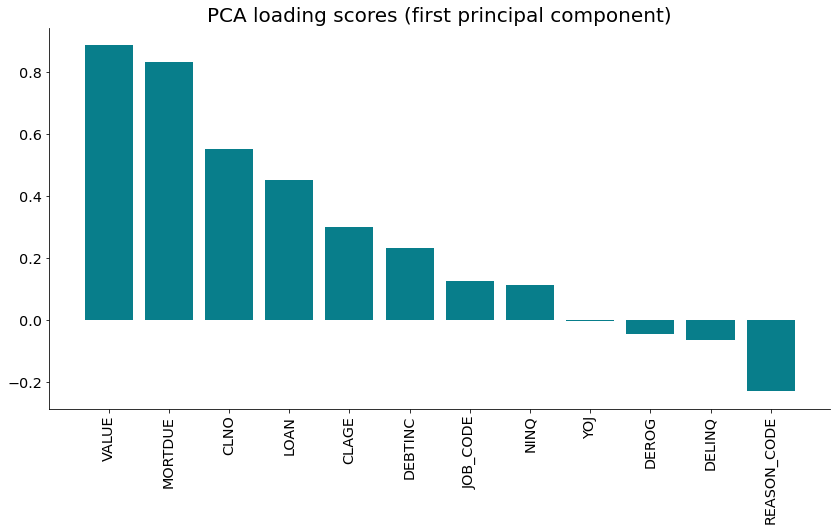

In [136]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

##### Method #6 — Mendapatkan importances dari ADABOOST

In [137]:
from sklearn.ensemble import AdaBoostClassifier

ada = DecisionTreeClassifier()
ada.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': ada.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


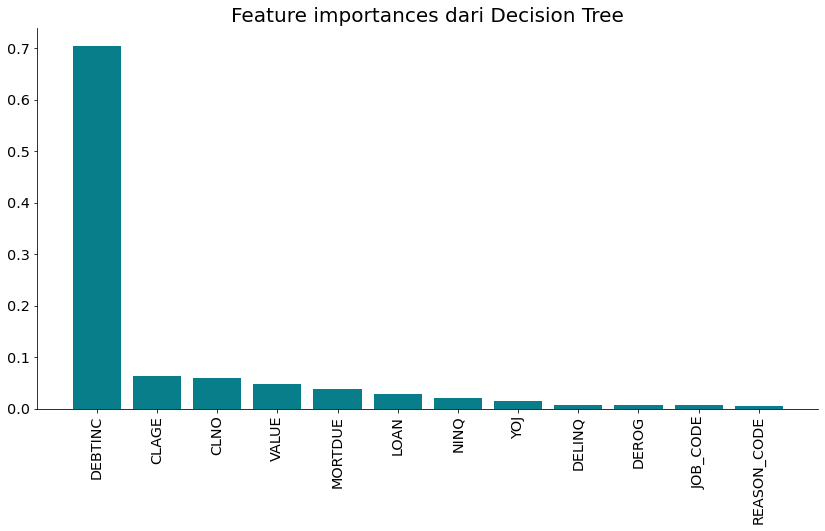

In [138]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari Decision Tree', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Dari keenam metode feature importance di atas, dapat dilihat bahwa :
* 5 dari 6 metode menghasilkan nilai importance paling tinggi pada `DEBTINC`
* 4 dari 6 metode tidak menghasilkan nilai importance negatif
* tidak ada feature yang perlu untuk dihilangkan karena mayoritas metode tidak menghasilkan nilai importance negatif

### >> ML Preparation

In [139]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_CODE,JOB_CODE
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645,1,2
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645,1,2
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645,1,2
3,1,1500,61739.0,89235.5,4.0,0.0,0.0,123.000000,1.0,31.0,39.387645,0,2
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129,1,1


In [140]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_CODE,JOB_CODE
5859,0,51800,174945.0,251643.0,5.0,0.0,0.0,257.807929,1.0,33.0,40.174065,0,3
5861,0,52000,38248.0,85298.0,10.0,0.0,0.0,178.578482,1.0,21.0,25.513966,1,5
5862,0,52200,48350.0,90240.0,10.0,0.0,0.0,341.828812,0.0,7.0,24.016671,1,2
5863,0,52200,41301.0,67400.0,5.0,1.0,0.0,181.502354,1.0,15.0,30.626188,0,1
5864,0,52200,65191.0,81115.0,10.0,0.0,0.0,173.214284,1.0,21.0,24.981883,1,5


In [141]:
x=df.drop('BAD',axis='columns')
y=df['BAD']
print(x.shape, y.shape)

(5246, 12) (5246,)


#### >> Mencari score dari beberapa model

In [142]:
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
print("Score Logistic Regression =", round(LR.score(x_test,y_test), 4))

SVM = svm.SVC(decision_function_shape="ovr").fit(x_train, y_train)
y_pred_SVM = SVM.predict(x_test)
print("Score SVM =", round(SVM.score(x_test, y_test), 4))

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
print("Score Random Forest =", round(RF.score(x_test, y_test), 4))

# instantiate the DecisionTreeClassifier and fit model with criterion gini index
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0).fit(x_train, y_train)
y_pred_DTC_gini = DTC_gini.predict(x_test)
print("Score DecisionTreeClassifier model with criterion gini index =", round(DTC_gini.score(x_test, y_test), 4))

# instantiate the DecisionTreeClassifier and fit model with criterion entropy
DTC_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train, y_train)
y_pred_DTC_en = DTC_entropy.predict(x_test)
print("Score DecisionTreeClassifier model with criterion criterion entropy =", round(DTC_entropy.score(x_test, y_test), 4))

NB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(x_train, y_train)
y_pred_NB = NB.predict(x_test)
print("Score Naive Bayes =", round(NB.score(x_test, y_test), 4))

LBMC = lgb.LGBMClassifier().fit(x_train, y_train)
y_pred_LBMC = LBMC.predict(x_test)
print("Score LightGBM Classifier =", round(LBMC.score(x_test, y_test), 4))

XBGC = XGBClassifier(booster = 'gbtree', eval_metric = 'mlogloss').fit(x_train, y_train)
y_pred_XGBC = XBGC.predict(x_test)
print("Score XGB Classifier =", round(XBGC.score(x_test, y_test), 4))

KNNC = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
y_pred_KNNC = KNNC.predict(x_test)
print("Score KNN Classifier =", round(KNNC.score(x_test, y_test), 4))

# Create adaboost classifer object
ABC = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(x_train, y_train)
y_pred_ABC = ABC.predict(x_test)
print("Score AdaBoost Classifier =", round(ABC.score(x_test, y_test), 4))

ModuleNotFoundError: No module named 'xgboost'

#### >> Accuracy, Precision, Recall, ROC Comparation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

accuracy, precision, recall, roc = [],[],[],[]
predictions = [y_pred_LR,y_pred_SVM,y_pred_RF,y_pred_DTC_gini,y_pred_DTC_en,y_pred_NB,y_pred_LBMC,y_pred_XGBC,y_pred_KNNC,y_pred_ABC]

for i in range(len(predictions)):
    accuracy.append(accuracy_score(y_test,predictions[i]))
    precision.append(precision_score(y_test,predictions[i]))
    recall.append(recall_score(y_test,predictions[i]))
    roc.append(roc_auc_score(y_test,predictions[i]))

compare = pd.DataFrame({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'ROC_Score':roc},
                index = ['Logistic Regression','SVM','Random Forest','Decision Tree (gini)','Decision Tree (entropy)','Naive Bayes','LightGBM','XGBoost','KNN','AdaBoost'])
compare.sort_values('Accuracy',ascending=False).T

,LightGBM,Random Forest,Decision Tree (entropy),XGBoost,Decision Tree (gini),AdaBoost,KNN,Logistic Regression,SVM,Naive Bayes
Accuracy,0.964422,0.959975,0.955527,0.955527,0.954892,0.953621,0.850064,0.847522,0.84244,0.486658
Precision,0.989796,0.989418,0.994444,0.978495,0.988950,0.967914,0.642857,0.548780,0.00000,0.172131
Recall,0.782258,0.754032,0.721774,0.733871,0.721774,0.729839,0.108871,0.181452,0.00000,0.592742
ROC_Score,0.890375,0.876262,0.860510,0.865427,0.860133,0.862657,0.548779,0.576774,0.50000,0.529780


#### >> Confusion Matrix

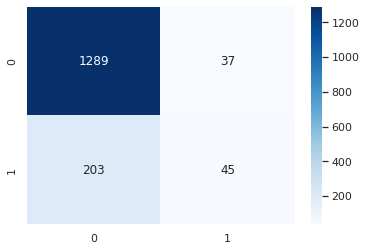

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix of Logistic Regression
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, fmt='d', cmap='Blues')

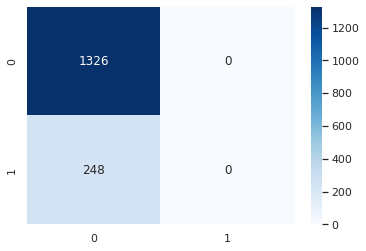

In [ ]:
# Confusion Matrix of SVM
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d', cmap='Blues')

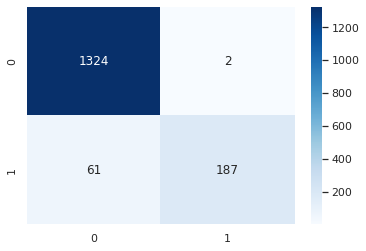

In [ ]:
# Confusion Matrix of Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='d', cmap='Blues')

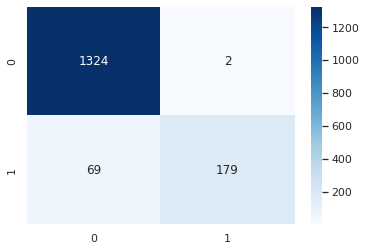

In [ ]:
# Confusion Matrix of DecisionTreeClassifier with criterion gini
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_gini), annot=True, fmt='d', cmap='Blues')

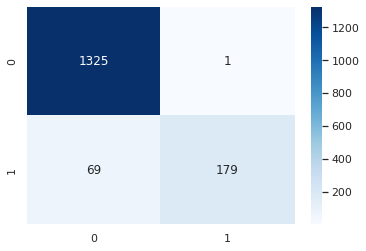

In [ ]:
# Confusion Matrix of DecisionTreeClassifier with criterion entropy
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_en), annot=True, fmt='d', cmap='Blues')

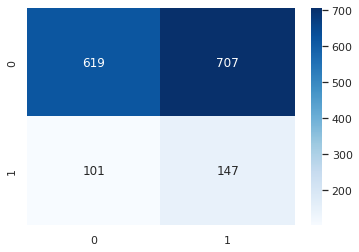

In [ ]:
# Confusion Matrix of Naive Bayes
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True, fmt='d', cmap='Blues')

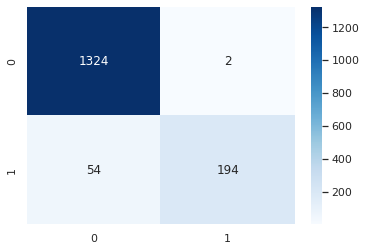

In [ ]:
# Confusion Matrix of LightGBM Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_LBMC), annot=True, fmt='d', cmap='Blues')

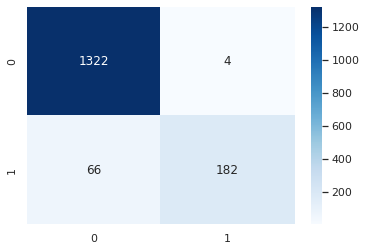

In [ ]:
# Confusion Matrix of XGBoost Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_XGBC), annot=True, fmt='d', cmap='Blues')

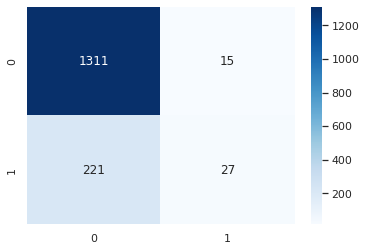

In [ ]:
# Confusion Matrix of KNN Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_KNNC), annot=True, fmt='d', cmap='Blues')

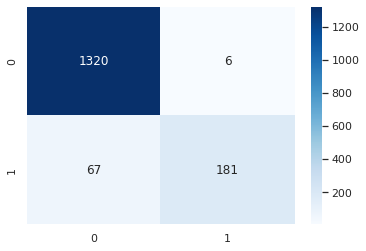

In [ ]:
# Confusion Matrix of AdaBoost Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_ABC), annot=True, fmt='d', cmap='Blues')

## Classification Reports Sebelum HyperParameter Tuning

In [ ]:
from sklearn.metrics import classification_report

predictions = [y_pred_LR,y_pred_SVM,y_pred_RF,y_pred_DTC_gini,y_pred_DTC_en,y_pred_NB,y_pred_LBMC,y_pred_XGBC,y_pred_KNNC,y_pred_ABC]
indexes = ['Logistic Regression','SVM','Random Forest','Decision Tree (gini)','Decision Tree (entropy)','Naive Bayes','LightGBM','XGBoost','KNN','AdaBoost']

In [ ]:
#Classification Report of Logistic Regression 
print('Classification Report of',indexes[0],'\n',classification_report(y_test,predictions[0]))

Classification Report of Logistic Regression 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1326
           1       0.55      0.18      0.27       248

    accuracy                           0.85      1574
   macro avg       0.71      0.58      0.59      1574
weighted avg       0.81      0.85      0.81      1574



In [ ]:
#Classification Report of SVM  
print('Classification Report of',indexes[1],'\n',classification_report(y_test,predictions[1]))

Classification Report of SVM 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1326
           1       0.00      0.00      0.00       248

    accuracy                           0.84      1574
   macro avg       0.42      0.50      0.46      1574
weighted avg       0.71      0.84      0.77      1574



In [ ]:
#Classification Report of Random Forest 
print('Classification Report of',indexes[2],'\n',classification_report(y_test,predictions[2]))

Classification Report of Random Forest 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1326
           1       0.99      0.75      0.86       248

    accuracy                           0.96      1574
   macro avg       0.97      0.88      0.92      1574
weighted avg       0.96      0.96      0.96      1574



In [ ]:
#Classification Report of Decision Tree (gini) 
print('Classification Report of',indexes[3],'\n',classification_report(y_test,predictions[3]))

Classification Report of Decision Tree (gini) 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1326
           1       0.99      0.72      0.83       248

    accuracy                           0.95      1574
   macro avg       0.97      0.86      0.90      1574
weighted avg       0.96      0.95      0.95      1574



In [ ]:
#Classification Report of Decision Tree (entropy) 
print('Classification Report of',indexes[4],'\n',classification_report(y_test,predictions[4]))

Classification Report of Decision Tree (entropy) 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1326
           1       0.99      0.72      0.84       248

    accuracy                           0.96      1574
   macro avg       0.97      0.86      0.91      1574
weighted avg       0.96      0.96      0.95      1574



In [ ]:
#Classification Report of Naive Bayes 
print('Classification Report of',indexes[5],'\n',classification_report(y_test,predictions[5]))

Classification Report of Naive Bayes 
               precision    recall  f1-score   support

           0       0.86      0.47      0.61      1326
           1       0.17      0.59      0.27       248

    accuracy                           0.49      1574
   macro avg       0.52      0.53      0.44      1574
weighted avg       0.75      0.49      0.55      1574



In [ ]:
#Classification Report of LightGBM 
print('Classification Report of',indexes[6],'\n',classification_report(y_test,predictions[6]))

Classification Report of LightGBM 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1326
           1       0.99      0.78      0.87       248

    accuracy                           0.96      1574
   macro avg       0.98      0.89      0.93      1574
weighted avg       0.97      0.96      0.96      1574



In [ ]:
#Classification Report of XGBoost 
print('Classification Report of',indexes[7],'\n',classification_report(y_test,predictions[7]))

Classification Report of XGBoost 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1326
           1       0.98      0.73      0.84       248

    accuracy                           0.96      1574
   macro avg       0.97      0.87      0.91      1574
weighted avg       0.96      0.96      0.95      1574



In [ ]:
#Classification Report of KNN 
print('Classification Report of',indexes[8],'\n',classification_report(y_test,predictions[8]))

Classification Report of KNN 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1326
           1       0.64      0.11      0.19       248

    accuracy                           0.85      1574
   macro avg       0.75      0.55      0.55      1574
weighted avg       0.82      0.85      0.80      1574



In [ ]:
#Classification Report of AdaBoost 
print('Classification Report of',indexes[9],'\n',classification_report(y_test,predictions[9]))

Classification Report of AdaBoost 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1326
           1       0.97      0.73      0.83       248

    accuracy                           0.95      1574
   macro avg       0.96      0.86      0.90      1574
weighted avg       0.95      0.95      0.95      1574



## Inisialisasi Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Random Forest
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

NameError: name 'x_train' is not defined

In [ ]:
#Logistic Regression
logrfc = LogisticRegression()

#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logrfc, hyperparameters, cv=10)
#Fitting Model
best_model = clf.fit(x_train,y_train)
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Score of Logistic Regression after Tuning : ',best_model.best_score_)

In [ ]:
#Decision Tree
dtc = DecisionTreeClassifier()
tuned_param = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf_dtc = GridSearchCV(dtc, cv = 10, param_grid = tuned_param, scoring = 'accuracy')
clf_dtc.fit(x_train, y_train)
print(clf_dtc.best_params_)
print(clf_dtc.best_score_)

In [ ]:
#SVM
svmc = svm.SVC()
tuned_param_svmc = [{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}]
clf_svmc = GridSearchCV(svmc, cv = 10, param_grid = tuned_param_svmc, refit=True,verbose=2 ,scoring = 'accuracy')
clf_svmc.fit(x_train, y_train)
print(clf_svmc.best_params_)
print(clf_svmc.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s


In [ ]:
#KNeighborsClassifier
knn = KNeighborsClassifier()
params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]
clf_knn = GridSearchCV(knn, cv = 10, param_grid = params, scoring = 'accuracy')
clf_knn.fit(x_train, y_train)
print(clf_knn.best_params_)
print(clf_knn.best_score_)

In [ ]:
#Multinomial Naive Bayes 
multinomial_nb = MultinomialNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(multinomial_nb, param_grid=params, n_jobs=-1, cv=10, verbose=5)
multinomial_nb_grid.fit(x_train, y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

## Classification Reports Sesudah HyperParameter Tuning